#### Plot the monthly number of searches for flights arriving at Malaga, Madrid or Barcelona
For arriving airport, you can use the Destination column in the searches file.
Plot a curve for Malaga, another one for Madrid, and another one for Barcelona, in the same figure.

### 1) Get familiar with data

In [12]:
import pandas as pd
pd.options.display.max_columns=None

In [2]:
!ls

 10-11_Python_AmadChall_v19.pptx
 Amadeus_Challenge_Class.ipynb
 Amadeus_Challenge_Test.ipynb
 HowToTackleDataScienceChallenge.ipynb
 bookings.3columns.sorted.bz2
 bookings.3columns.sorted2.bz2
 bookings.csv.bz2
 bookings.sample.csv.bz2
 ch_01-Empty.ipynb
 ch_02-Empty.ipynb
 ch_03-MINE.ipynb
 ch_05-MINE.ipynb
 ch_05-MINE_RemoteConectionToWebServer.ipynb
 ch_05-empty.ipynb
 searches.csv.bz2
 top_airports.csv
'~$10-11_Python_AmadChall_v19.pptx'


In [3]:
s=pd.read_csv('./searches.csv.bz2', sep='^', nrows=10000)
#cojemos una muestra de 10000 filas

In [4]:
s.shape

(10000, 45)

In [6]:
s.columns.tolist()
#parece que no hay white spaces en las columnas

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [7]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

In [13]:
s.sample(5)
#TxnCode: transaction code
#Country del office ID
#NbSegments: number of segments es número de escalas
#IsPublishedForNeg: is published for negoation, si el precio viene prenegociado por una agencia

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
542,2013-01-01,15:57:37,MPT,489153b50ba6de99e1dd44d92db2c06b,ES,BIO,FUE,0,1,BIO,FUE,2013-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BCN
8936,2013-01-09,22:04:09,MGP,ccaf1e19d038c74b617ad6230bc4e620,DE,FRA,HKG,1,2,FRA,HKG,2013-05-26,LK,NaN,HKG,FRA,2013-05-27,LK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CGN
5809,2013-01-06,20:50:53,MPT,440642a9bdaeb6287f826cefd73255e8,US,ORF,NAS,0,1,ORF,NAS,2013-02-16,FK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
5006,2013-01-06,04:55:34,MPT,440642a9bdaeb6287f826cefd73255e8,US,SFO,LON,1,2,SFO,LON,2013-05-17,FX,NaN,LON,SFO,2013-05-27,FX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
6648,2013-01-07,07:40:38,FCP,8d2a1e767a6c0231e998716660848886,CA,YEG,YQR,0,1,YEG,YQR,2013-02-08,KM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,YYZ


In [14]:
s.describe(include='all')
#incluye no solo las columnas numéricas sino todas. Incluyendo una fila 'unique'

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-04,11:33:28,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,BKK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-03-08,UV,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


### 2) Select the columns of interest


In [ ]:
#Columns: Destination, Date

In [45]:
import pandas as pd
pd.options.display.max_columns=None
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=10000)

In [17]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


### 3) What to do with NaN

In [18]:
#Si nos falta una fecha o un destination no nos sirve para nada así que nos deshacemos de los NaN
s=s.dropna()

### 4) Make action plan

1) filtrar BCN, MAD,AGP <br>
2) Convertir dates to month (as text)<br>
3) group by airport, date <br>
4) count <br>
5) plot

In [46]:
#1) filtrar BCN, MAD,AGP
MADfilter = s['Destination'] == 'MAD'
BCNfilter = s['Destination'] == 'BCN'
AGPfilter = s['Destination'] == 'AGP'
s = s[MADfilter | BCNfilter | AGPfilter]
s

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
...,...,...
9830,2013-01-10,AGP
9881,2013-01-10,BCN
9906,2013-01-10,MAD
9947,2013-01-10,MAD


In [ ]:
#otra manera de filtrar es usando .isin()
#s=s[s['Destination'].isin(['MAD','BCN', 'AGP'])]

In [48]:
#2) Convertir dates to month
s['Date'] = s['Date'].str[:7]
s

,Date,Destination
4,2013-01,MAD
93,2013-01,AGP
113,2013-01,BCN
147,2013-01,AGP
151,2013-01,MAD
...,...,...
9830,2013-01,AGP
9881,2013-01,BCN
9906,2013-01,MAD
9947,2013-01,MAD


In [61]:
#3) group by airport, date
#4) count
import pandas as pd
pd.options.display.max_columns=None
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=10000)
s=s.dropna()
s=s[s['Destination'].isin(['MAD','BCN', 'AGP'])]
s['Date'] = s['Date'].str[:7]

In [62]:
s.head()

,Date,Destination
4,2013-01,MAD
93,2013-01,AGP
113,2013-01,BCN
147,2013-01,AGP
151,2013-01,MAD


In [65]:
#así no te cuenta, tendríamos que añadir una columna más
s_gr=s.groupby(['Date', 'Destination']).count()
s_gr

Empty DataFrame
Columns: []
Index: [(2013-01, AGP), (2013-01, BCN), (2013-01, MAD)]

In [66]:
#con size() sí te cuenta
s_gr=s.groupby(['Date', 'Destination']).size()
s_gr

Date     Destination
2013-01  AGP             48
         BCN            162
         MAD            125
dtype: int64

In [77]:
#recapitulamos
#vemos que en el sample sólo hay datos de un mes, así que cogemos una muestra más grande: 100000
import pandas as pd
pd.options.display.max_columns=None
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s=s[s['Destination'].isin(['MAD','BCN', 'AGP'])]
s['Month'] = s['Date'].str[:7]
s_gr=s.groupby(['Month', 'Destination']).count().reset_index()
s_gr

,Month,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [78]:
s_gr=s_gr.rename(columns={'Date':'Count'})
s_gr

,Month,Destination,Count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [82]:
#usamos pivot para re-estructura la tabla para poder plotearla
plot_ready=s_gr.pivot('Month', 'Destination', 'Count')
plot_ready

Destination,AGP,BCN,MAD
Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


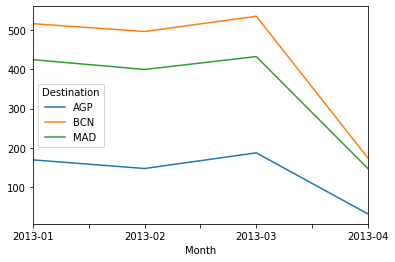

In [80]:
plot_ready.plot()

### Ahora hacer que el código funciones con chunks!

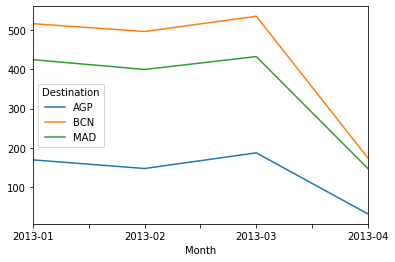

In [88]:
#recapitulación de lo que tenemos
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns=None
s=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000)
s=s.dropna()
s=s[s['Destination'].isin(['MAD','BCN', 'AGP'])]
s['Month'] = s['Date'].str[:7]
s_gr=s.groupby(['Month', 'Destination']).count().reset_index()
s_gr=s_gr.rename(columns={'Date':'Count'})
plot_ready=s_gr.pivot('Month', 'Destination', 'Count')
plot_ready.plot()

a crear chunks!

0 0
1 12
2 24
3 36
4 48
5 60
6 72
7 84
8 96
9 108


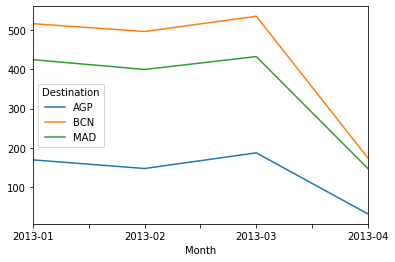

In [100]:
#calculamos chunks de una muestra de 100000
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None

#DF vacío
all_chunks = pd.DataFrame()

si=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000, chunksize=10000) #chunksize

for i, e in enumerate(si):
    print(i, len(all_chunks))
    s=s.dropna()
    s=s[s['Destination'].isin(['MAD','BCN', 'AGP'])]
    s['Month'] = s['Date'].str[:7]
    result=s.groupby(['Month', 'Destination']).count().reset_index()
    all_chunks=all_chunks.append(result)
    #####
    
all_gr=all_chunks.groupby(['Month','Destination']).sum().reset_index()
all_gr=all_chunks=s_gr.rename(columns={'Date':'Count'})
plot_ready=all_gr.pivot('Month', 'Destination', 'Count')
plot_ready.plot()

In [102]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


0 0
1 36
2 72
3 108
4 144
5 180
6 216
7 252
8 288
9 324
10 360
11 396
12 432
13 468
14 504
15 540
16 576
17 612
18 648
19 684
20 720
CPU times: user 2min 10s, sys: 1.39 s, total: 2min 12s
Wall time: 2min


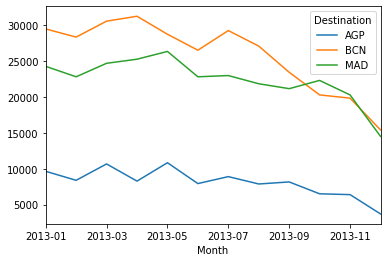

In [106]:
%%time
#por fin calculamos con todo el archivo
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=None

all_chunks = pd.DataFrame()

#si=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], nrows=100000, chunksize=10000)
si=pd.read_csv('./searches.csv.bz2', sep='^', usecols=['Date', 'Destination'], chunksize=1000000)

for i, e in enumerate(si):
    print(i, len(all_chunks))
    e=e.dropna()
    e=e[e['Destination'].isin(['MAD','BCN', 'AGP'])]
    e['Month'] = e['Date'].str[:7]
    result=e.groupby(['Month', 'Destination']).count().reset_index()
    all_chunks=all_chunks.append(result)
    
all_gr=all_chunks.groupby(['Month','Destination']).sum().reset_index()
all_gr=all_gr.rename(columns={'Date':'Count'})
plot_ready=all_gr.pivot('Month', 'Destination', 'Count')
plot_ready.plot()